In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

In [17]:
import matplotlib as mpl
mpl.rcParams['svg.fonttype'] = 'none'

In [18]:
repertory='simulated_data/neutral_model_sensibility_analysis/'

## PLASMID RICHNESS

In [19]:
innovation_vector=np.array([0,1e-6,1e-5,1.25e-5,2.5e-5,5e-5,1e-4])
dispersion_vector=np.array([0,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1])
nb_innovation=np.size(innovation_vector)
nb_dispersion=np.size(dispersion_vector)
nb_replicats=25

richesse_alpha_mean=np.zeros((nb_innovation,nb_dispersion,nb_replicats))
richesse_gamma=np.zeros((nb_innovation,nb_dispersion,nb_replicats))
richesse_beta=np.zeros((nb_innovation,nb_dispersion,nb_replicats))

for i in range(nb_dispersion):
    for j in range(nb_innovation):
        sub_repertory=repertory+"dispersion="+str(dispersion_vector[i])+"_innovation="+str(innovation_vector[j])
        for k in range(nb_replicats):
            B = np.loadtxt(sub_repertory+'/simulation_'+str(k)+".csv", delimiter=',')
            richesse_gamma[j,i,k]=np.shape(B)[1]-1
            richesse_alpha=np.sum(B[:,1:]>0,1)
            richesse_alpha_mean[j,i,k]=np.mean(richesse_alpha)
            richesse_beta[j,i,k]=richesse_gamma[j,i,k]/richesse_alpha_mean[j,i,k]

In [20]:
print(np.min(np.mean(richesse_alpha_mean,2)))

v_min=7
v_max=np.max(np.mean(richesse_gamma,2))
print(v_max)

7.7
1676.2


/tmp/ipykernel_22064/2110489027.py:47: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0, 0, 1, 1])


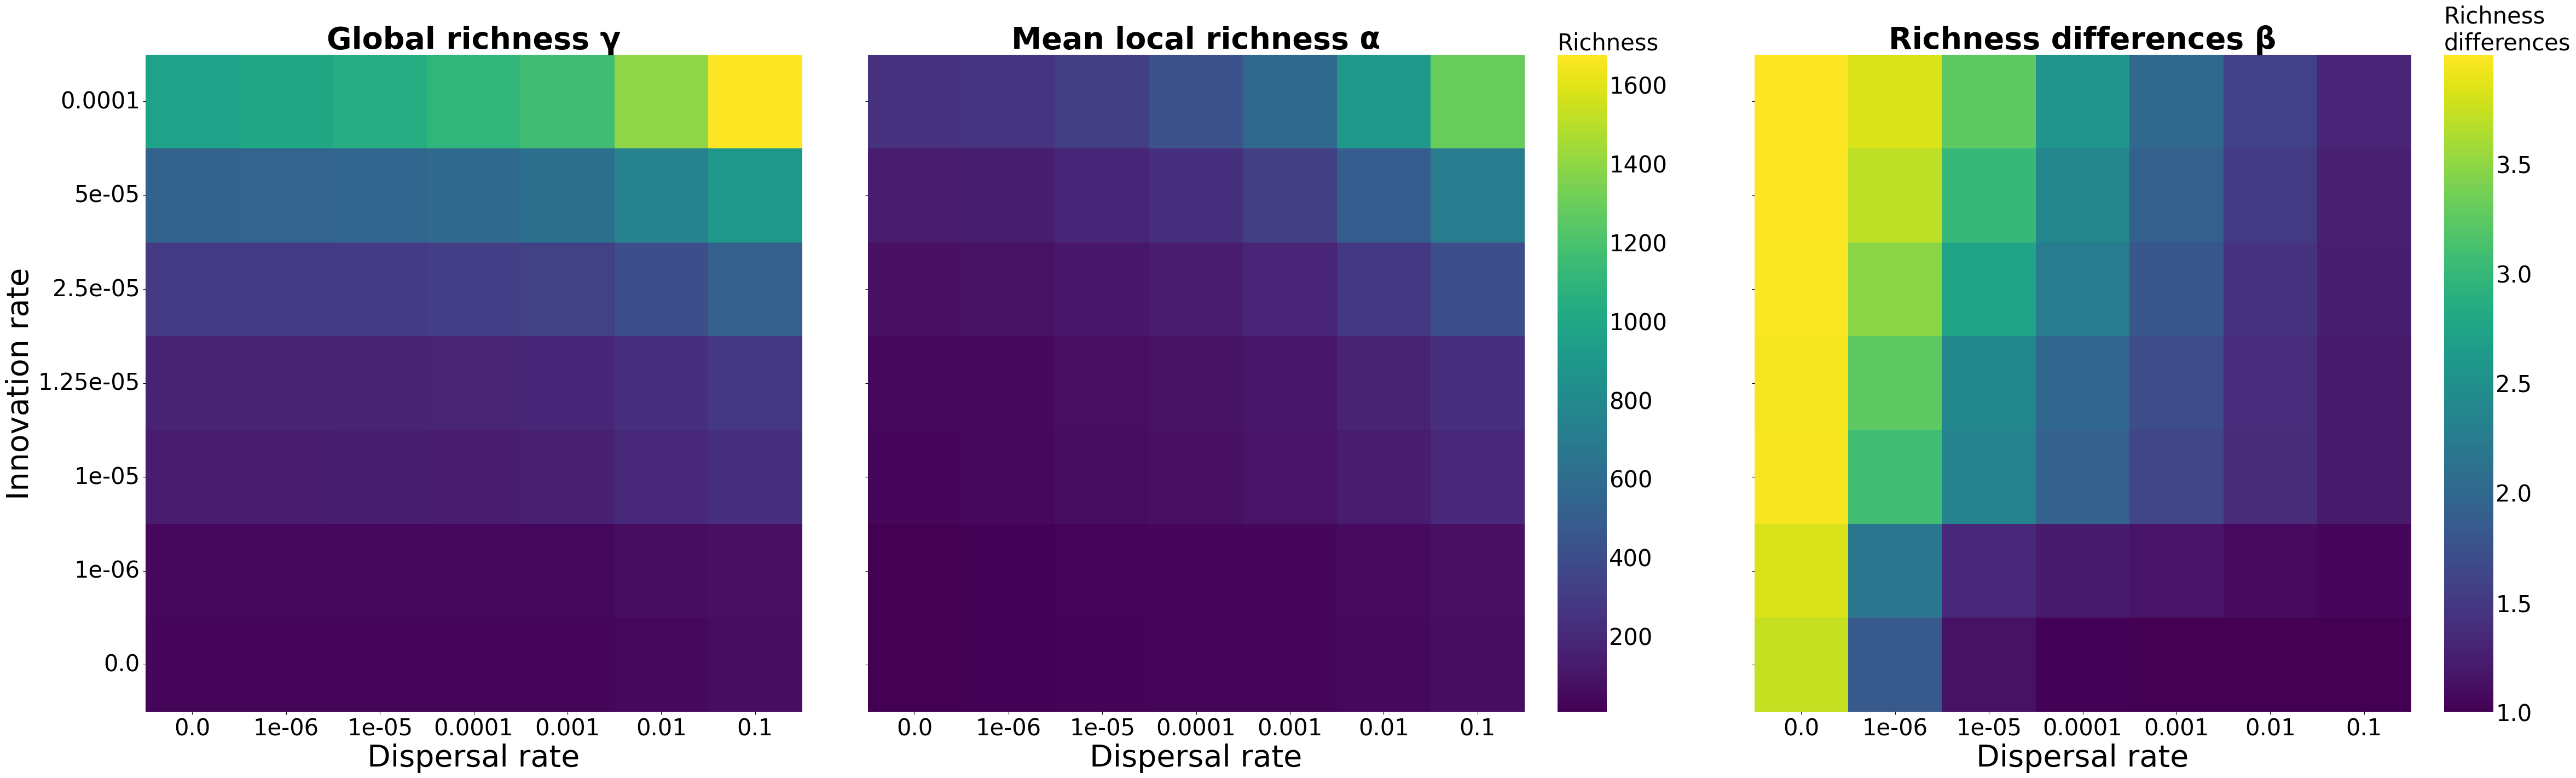

In [21]:
fig = plt.figure(figsize=(60, 15))
gs = GridSpec(nrows=1, ncols=5, width_ratios=[1, 1, 0.1, 1, 0.1], wspace=0.25)

# Positions [left, bottom, width, height]
ax_gamma     = fig.add_axes([0.05, 0.1, 0.2, 0.8])   # Heatmap γ
ax_alpha     = fig.add_axes([0.27, 0.1, 0.2, 0.8])   # Heatmap α
cbar_ax1     = fig.add_axes([0.48, 0.1, 0.015, 0.8]) # Colorbar γ
ax_beta      = fig.add_axes([0.54, 0.1, 0.2, 0.8])   # Heatmap β
cbar_ax2     = fig.add_axes([0.75, 0.1, 0.015, 0.8]) # Colorbar β

# --- Heatmap γ ---
sns.heatmap(np.mean(richesse_gamma, 2), ax=ax_gamma,
            cbar=True, cbar_ax=cbar_ax1, cmap="viridis",
            vmin=v_min, vmax=v_max)
ax_gamma.set_xlabel('Dispersal rate', size=40)
ax_gamma.set_ylabel('Innovation rate', size=40)
ax_gamma.set_xticklabels(dispersion_vector, rotation=0, size=30)
ax_gamma.set_yticklabels(innovation_vector, rotation=0, size=30)
ax_gamma.set_title('Global richness γ', size=40, weight='bold')
ax_gamma.invert_yaxis()
cbar_ax1.tick_params(labelsize=30, length=0)
cbar_ax1.set_title('Richness', size=30, loc="left")

# --- Heatmap α ---
sns.heatmap(np.mean(richesse_alpha_mean, 2), ax=ax_alpha,
            cbar=False, cmap="viridis",
            vmin=v_min, vmax=v_max)
ax_alpha.set_xlabel('Dispersal rate', size=40)
ax_alpha.set_xticklabels(dispersion_vector, rotation=0, size=30)
ax_alpha.set_yticklabels([])
ax_alpha.set_title('Mean local richness α', size=40, weight='bold')
ax_alpha.invert_yaxis()

# --- Heatmap β ---
sns.heatmap(np.mean(richesse_beta, 2), ax=ax_beta,
            cbar=True, cbar_ax=cbar_ax2, cmap="viridis",
            vmin=1, vmax=np.max(np.mean(richesse_beta, 2)))
ax_beta.set_xlabel('Dispersal rate', size=40)
ax_beta.set_ylabel('')
ax_beta.set_xticklabels(dispersion_vector, rotation=0, size=30)
ax_beta.set_yticklabels([])
ax_beta.set_title('Richness differences β', size=40, weight='bold')
ax_beta.invert_yaxis()
cbar_ax2.tick_params(labelsize=30, length=0)
cbar_ax2.set_title('Richness\ndifferences', size=30, loc="left")

fig.tight_layout(rect=[0, 0, 1, 1])
plt.show()

## PLASMID HETEROGENEITY

In [22]:
def simpson_global(B):
    tmp=B[:,1:]/np.sum(B[:,1:])
    return(np.sum(tmp**2))

In [23]:
def simpson_local(B):
    tmp=B[:,1:]/np.reshape(np.sum(B[:,1:],1),(4,-1))
    sa=np.sum(tmp**2,1)
    return(np.mean(sa))

In [24]:
innovation_vector=np.array([0,1e-6,1e-5,1.25e-5,2.5e-5,5e-5,1e-4])
dispersion_vector=np.array([0,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1])
nb_innovation=np.size(innovation_vector)
nb_dispersion=np.size(dispersion_vector)
nb_replicats=25

gini_simpson_alpha_mean=np.zeros((nb_innovation,nb_dispersion,nb_replicats))
gini_simpson_gamma=np.zeros((nb_innovation,nb_dispersion,nb_replicats))
gini_simpson_beta=np.zeros((nb_innovation,nb_dispersion,nb_replicats))

for i in range(nb_dispersion):
    for j in range(nb_innovation):
        sub_repertory=repertory+"dispersion="+str(dispersion_vector[i])+"_innovation="+str(innovation_vector[j])
        for k in range(nb_replicats):
            B = np.loadtxt(sub_repertory+'/simulation_'+str(k)+".csv", delimiter=',')
            gini_simpson_gamma[j,i,k]=1-simpson_global(B)
            gini_simpson_alpha_mean[j,i,k]=1-simpson_local(B)
            gini_simpson_beta[j,i,k]=gini_simpson_gamma[j,i,k]/gini_simpson_alpha_mean[j,i,k]

In [25]:
print(np.min(np.mean(gini_simpson_gamma,2)))
print(np.min(np.mean(gini_simpson_beta,2)))
print(np.min(np.mean(gini_simpson_alpha_mean,2)))

v_max=1
v_min=0.75

0.8711595436513897
1.0039508677269824
0.7567237763113429


/tmp/ipykernel_22064/1869830990.py:47: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0, 0, 1, 1])


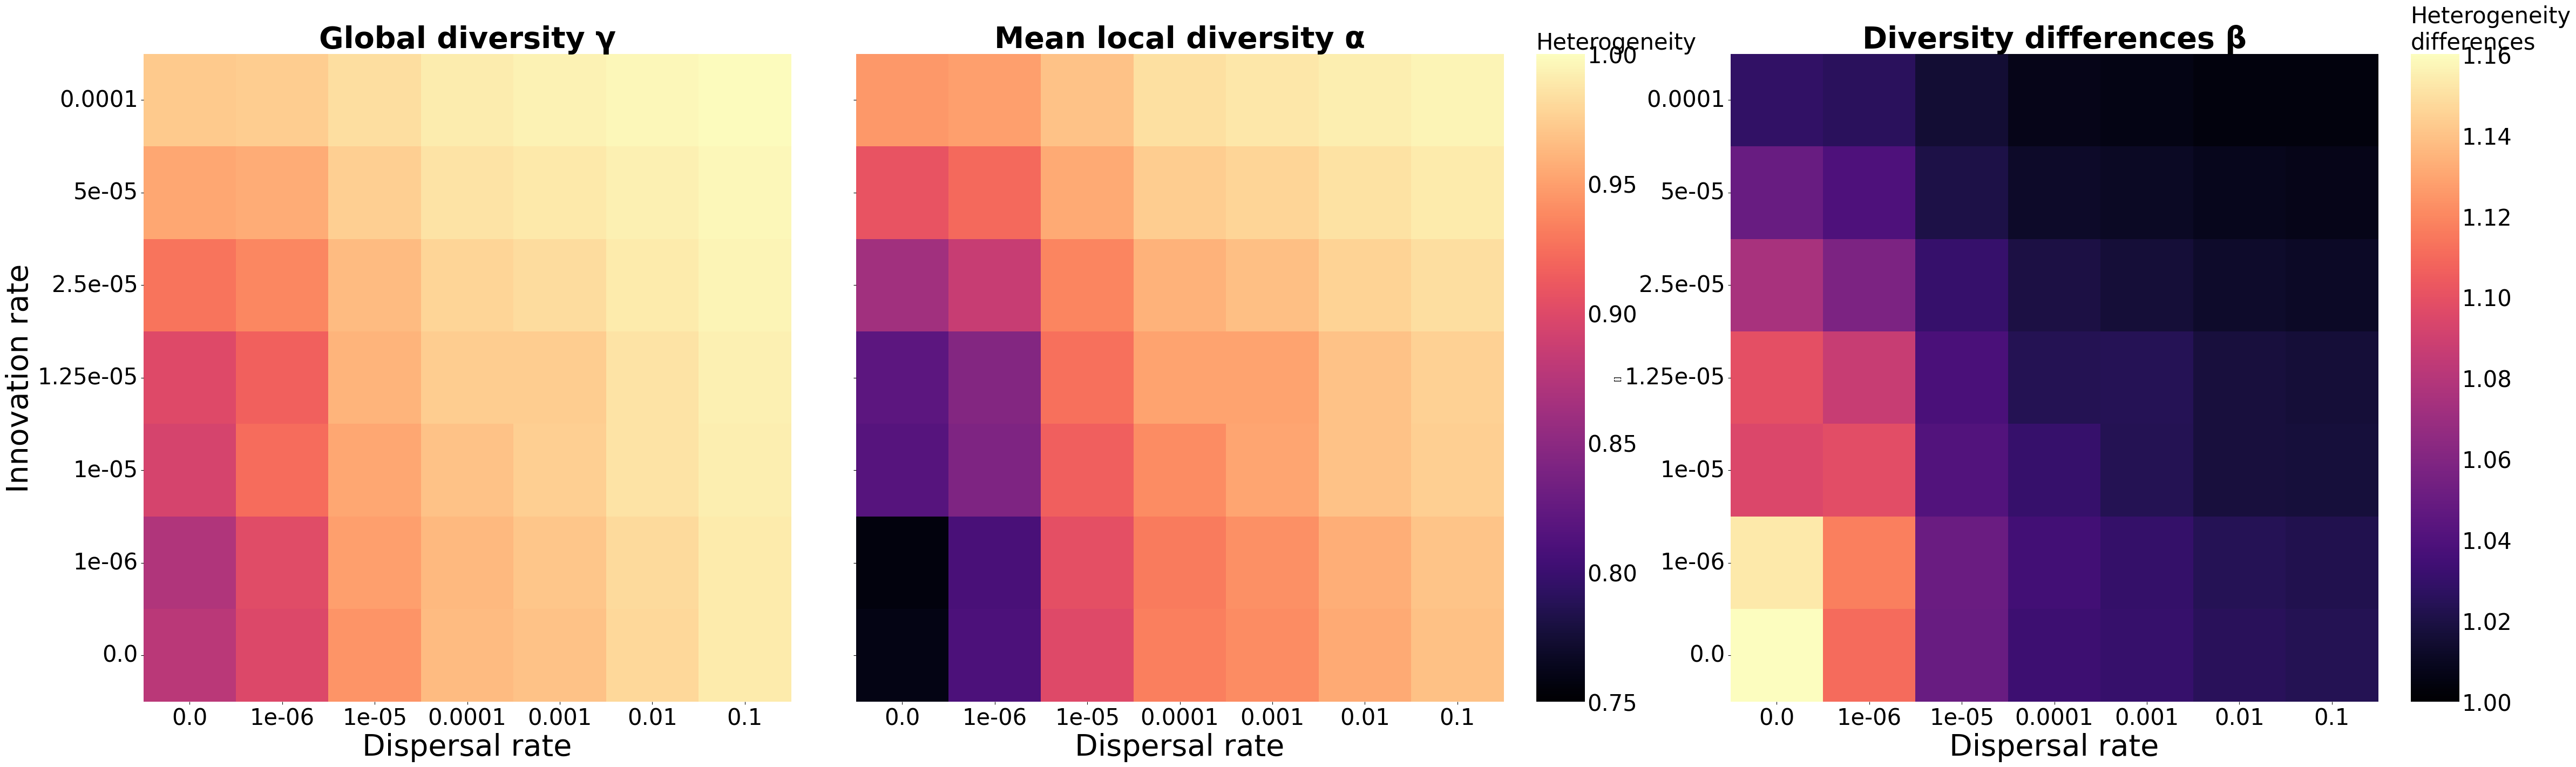

In [26]:
fig = plt.figure(figsize=(60, 15))
gs = GridSpec(nrows=1, ncols=5, width_ratios=[1, 1, 0.1, 1, 0.1], wspace=0.25)

# Positions [left, bottom, width, height]
ax_gamma     = fig.add_axes([0.05, 0.1, 0.2, 0.8])   # Heatmap γ
ax_alpha     = fig.add_axes([0.27, 0.1, 0.2, 0.8])   # Heatmap α
cbar_ax1     = fig.add_axes([0.48, 0.1, 0.015, 0.8]) # Colorbar γ
ax_beta      = fig.add_axes([0.54, 0.1, 0.2, 0.8])   # Heatmap β
cbar_ax2     = fig.add_axes([0.75, 0.1, 0.015, 0.8]) # Colorbar β

# --- Heatmap γ ---
sns.heatmap(np.mean(gini_simpson_gamma, 2), ax=ax_gamma,
            cbar=True, cbar_ax=cbar_ax1, cmap="magma",
            vmin=v_min, vmax=v_max)
ax_gamma.set_xlabel('Dispersal rate', size=40)
ax_gamma.set_ylabel('Innovation rate', size=40)
ax_gamma.set_xticklabels(dispersion_vector, rotation=0, size=30)
ax_gamma.set_yticklabels(innovation_vector, rotation=0, size=30)
ax_gamma.set_title('Global diversity γ', size=40, weight='bold')
ax_gamma.invert_yaxis()
cbar_ax1.tick_params(labelsize=30, length=0)
cbar_ax1.set_title('Heterogeneity', size=30, loc="left")

# --- Heatmap α ---
sns.heatmap(np.mean(gini_simpson_alpha_mean, 2), ax=ax_alpha,
            cbar=False, cmap="magma",
            vmin=v_min, vmax=v_max)
ax_alpha.set_xlabel('Dispersal rate', size=40)
ax_alpha.set_xticklabels(dispersion_vector, rotation=0, size=30)
ax_alpha.set_yticklabels([])
ax_alpha.set_title('Mean local diversity α', size=40, weight='bold')
ax_alpha.invert_yaxis()

# --- Heatmap β ---
sns.heatmap(np.mean(gini_simpson_beta, 2), ax=ax_beta,
            cbar=True, cbar_ax=cbar_ax2, cmap="magma",
            vmin=1, vmax=np.max(np.mean(gini_simpson_beta, 2)))
ax_beta.set_xlabel('Dispersal rate', size=40)
ax_beta.set_ylabel([])
ax_beta.set_xticklabels(dispersion_vector, rotation=0, size=30)
ax_beta.set_yticklabels(innovation_vector, rotation=0, size=30)
ax_beta.set_title('Diversity differences β', size=40, weight='bold')
ax_beta.invert_yaxis()
cbar_ax2.tick_params(labelsize=30, length=0)
cbar_ax2.set_title('Heterogeneity\ndifferences', size=30, loc="left")

fig.tight_layout(rect=[0, 0, 1, 1])
plt.show()